In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# load data
train_file = "C:/IITD/sem5/col774-ml/datasets/decision_tree/decision_tree/train.csv"
test_file = "C:/IITD/sem5/col774-ml/datasets/decision_tree/decision_tree/test.csv"
val_file = "C:/IITD/sem5/col774-ml/datasets/decision_tree/decision_tree/val.csv"
train_data = np.genfromtxt(train_file, delimiter=',')
test_data = np.genfromtxt(test_file, delimiter=',')
val_data = np.genfromtxt(val_file, delimiter=',')

In [3]:
def extract_data(data):
    x = data[:, :-1]
    y = data[:, -1].astype('int')
    return x, y

In [45]:
x, y = extract_data(train_data[2:])
x_test, y_test = extract_data(test_data[2:])
x_val, y_val = extract_data(val_data[2:])
num_attributes = x.shape[1]
num_labels = 7

In [5]:
parameters = {
    'n_estimators': list(np.arange(50, 451, 100)),
    'max_features': list(np.arange(0.1, 1, 0.2)),
    'min_samples_split': list(np.arange(2, 11, 2))
    }

parameters

{'n_estimators': [50, 150, 250, 350, 450],
 'max_features': [0.1,
  0.30000000000000004,
  0.5000000000000001,
  0.7000000000000001,
  0.9000000000000001],
 'min_samples_split': [2, 4, 6, 8, 10]}

In [6]:
parameters_est = {
    'max_features': list(np.arange(0.1, 1, 0.2))
    }

parameters_est

{'max_features': [0.1,
  0.30000000000000004,
  0.5000000000000001,
  0.7000000000000001,
  0.9000000000000001]}

In [16]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(max_depth=30, n_estimators=450, min_samples_split=2, oob_score=True, n_jobs=-1, verbose=1)

gs_clf = GridSearchCV(clf, parameters_est, n_jobs=-1, verbose=1)
gs_clf.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.6s finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=20, n_estimators=450,
                                              n_jobs=-1, oob_score=True,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.30000000000000004,
                                          0.5000000000000001,
                                          0.7000000000000001,
                                          0.9000000000000001]},
             verbose=1)

In [17]:
gs_clf.best_params_

{'max_features': 0.1}

In [13]:
opt_clf = RandomForestClassifier(n_estimators=450, min_samples_split=2, max_features=0.3, max_depth=20, oob_score=True, n_jobs=-1, verbose=1)

opt_clf.fit(x, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.6s finished


RandomForestClassifier(max_depth=20, max_features=0.3, n_estimators=450,
                       n_jobs=-1, oob_score=True, verbose=1)

In [20]:
def get_accuracy(model, x, y):
    return np.sum(model.predict(x) == y) * 100 / y.size

In [46]:
n_esimators_opt = 450
max_features_opt = 0.7
min_samples_split_opt = 2

mf_test_acc = []
mf_val_acc = []

for max_features in parameters['max_features']:
    print("mf", max_features)
    rf_clf = RandomForestClassifier(max_depth=40, max_features=max_features, n_estimators=n_esimators_opt, min_samples_split=min_samples_split_opt, oob_score=True, n_jobs=-1, verbose=1)

    rf_clf.fit(x, y)
    mf_test_acc.append(get_accuracy(rf_clf, x_test, y_test))
    mf_val_acc.append(get_accuracy(rf_clf, x_val, y_val))

mf 0.1
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    3.1

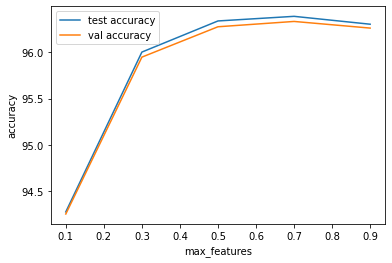

In [48]:
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.plot(parameters['max_features'], mf_test_acc, label="test accuracy")
plt.plot(parameters['max_features'], mf_val_acc, label="val accuracy")
plt.legend()
plt.savefig("max_features2.png")

In [30]:
n_esimators_opt = 450
max_features_opt = 0.7
min_samples_split_opt = 2

ne_test_acc = []
ne_val_acc = []
ne_range = [2, 10, 50, 200, 400, 600]

for ne in ne_range:
    print(ne)
    rf_clf = RandomForestClassifier(max_depth=30, max_features=max_features_opt, n_estimators=ne, min_samples_split=min_samples_split_opt, oob_score=True, n_jobs=-1, verbose=1)

    rf_clf.fit(x, y)
    ne_test_acc.append(get_accuracy(rf_clf, x_test, y_test))
    ne_val_acc.append(get_accuracy(rf_clf, x_val, y_val))

2
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
10
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurren

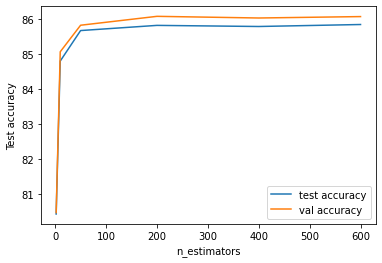

In [38]:
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.plot(list(ne_range), ne_test_acc, label="test accuracy")
plt.plot(list(ne_range), ne_val_acc, label="val accuracy")
plt.legend()
plt.savefig("n_estimators_acc.png")

In [39]:
n_esimators_opt = 450
max_features_opt = 0.7
min_samples_split_opt = 2

ms_range = [2, 4, 8, 16, 32]
ms_test_acc = []
ms_val_acc = []

for ms in ms_range:
    print(ms)
    rf_clf = RandomForestClassifier(max_depth=30, max_features=max_features_opt, n_estimators=n_esimators_opt, min_samples_split=ms, oob_score=True, n_jobs=-1, verbose=1)

    rf_clf.fit(x, y)
    ms_test_acc.append(get_accuracy(rf_clf, x_test, y_test))
    ms_val_acc.append(get_accuracy(rf_clf, x_val, y_val))

2
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    3.3s fin

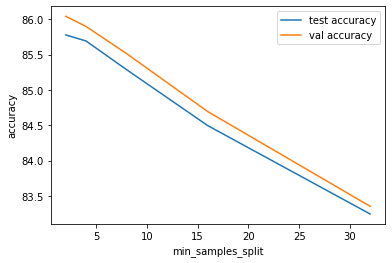

In [41]:
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.plot(list(ms_range), ms_test_acc, label="test accuracy")
plt.plot(list(ms_range), ms_val_acc, label="val accuracy")
plt.legend()
plt.savefig("min_samples_split_acc.png")